In [234]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib_inline 
from ydata_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split

In [235]:
df=pd.read_csv("C:\Downloads\housing\housing\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [236]:
prof=ProfileReport(df)

In [237]:
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [238]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [239]:
df["ocean_proximity"].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [240]:
df["ocean_proximity"].value_counts()    


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

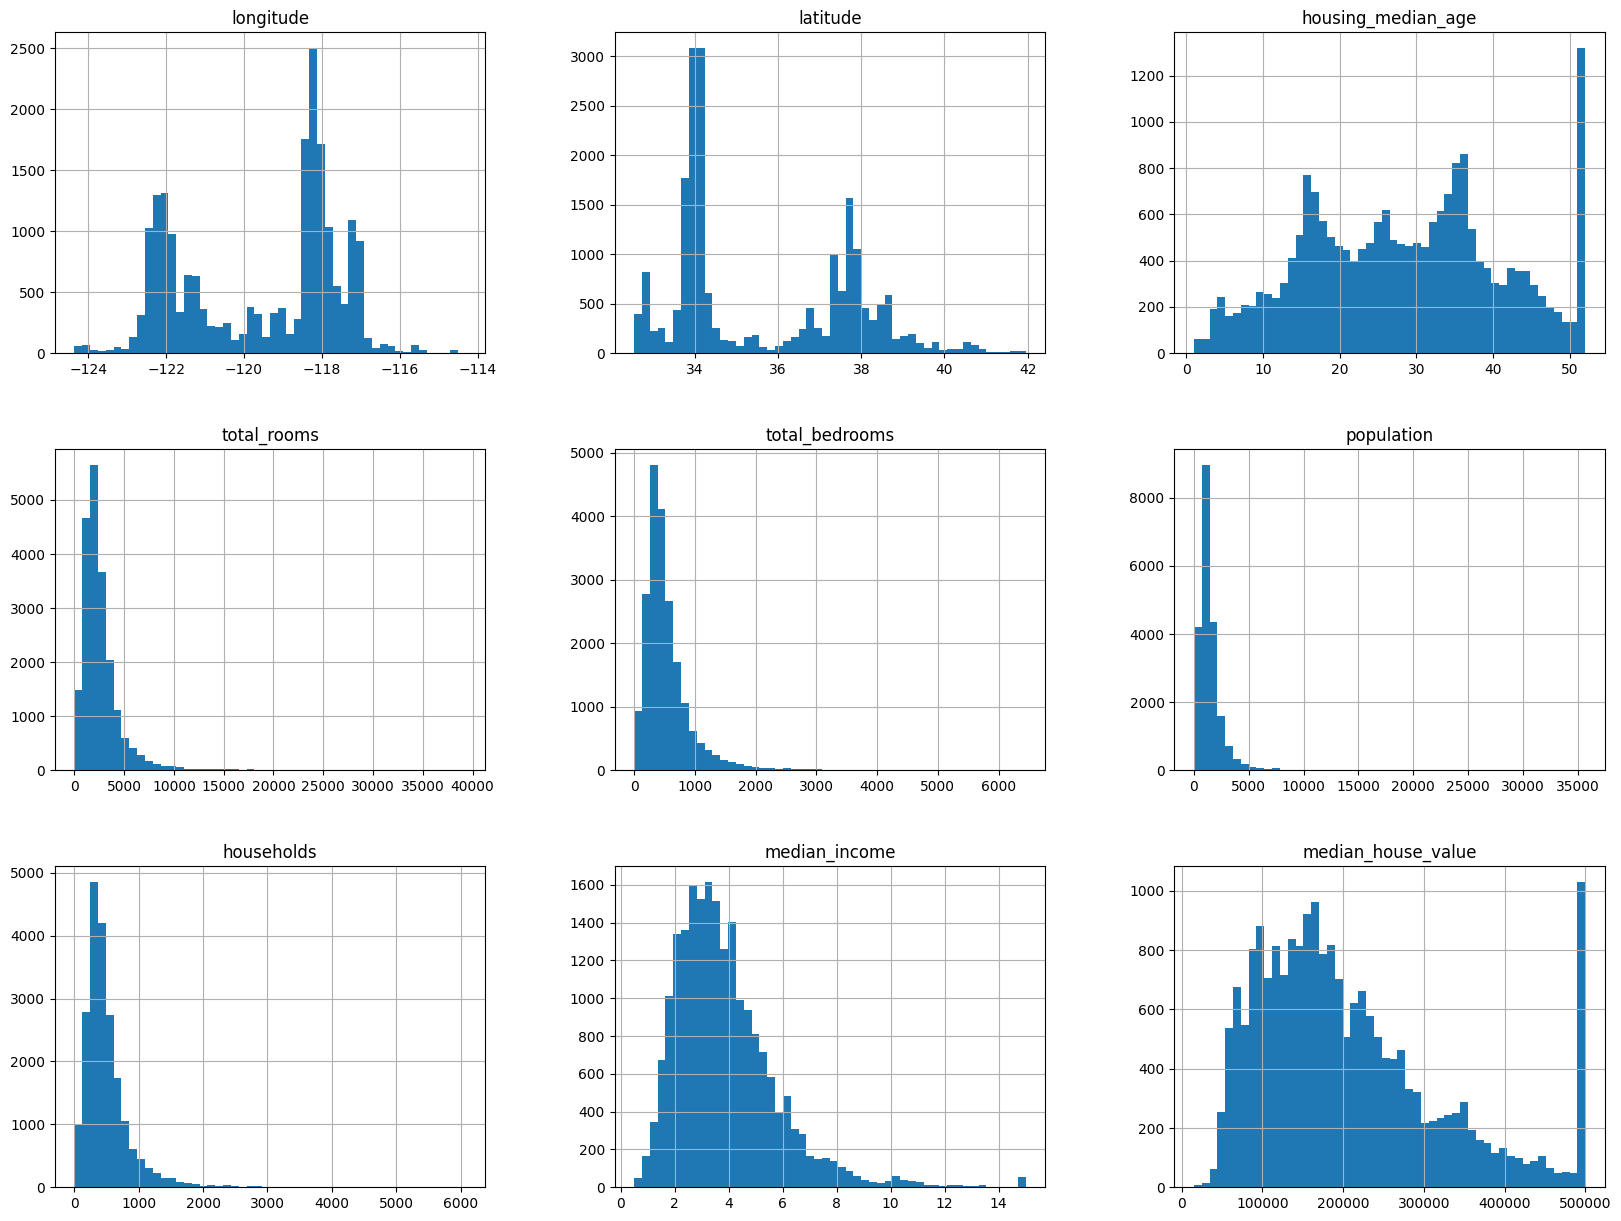

In [241]:
df.hist(bins=50,figsize=(20,15))

In [242]:
import matplotlib.pyplot    as plt  

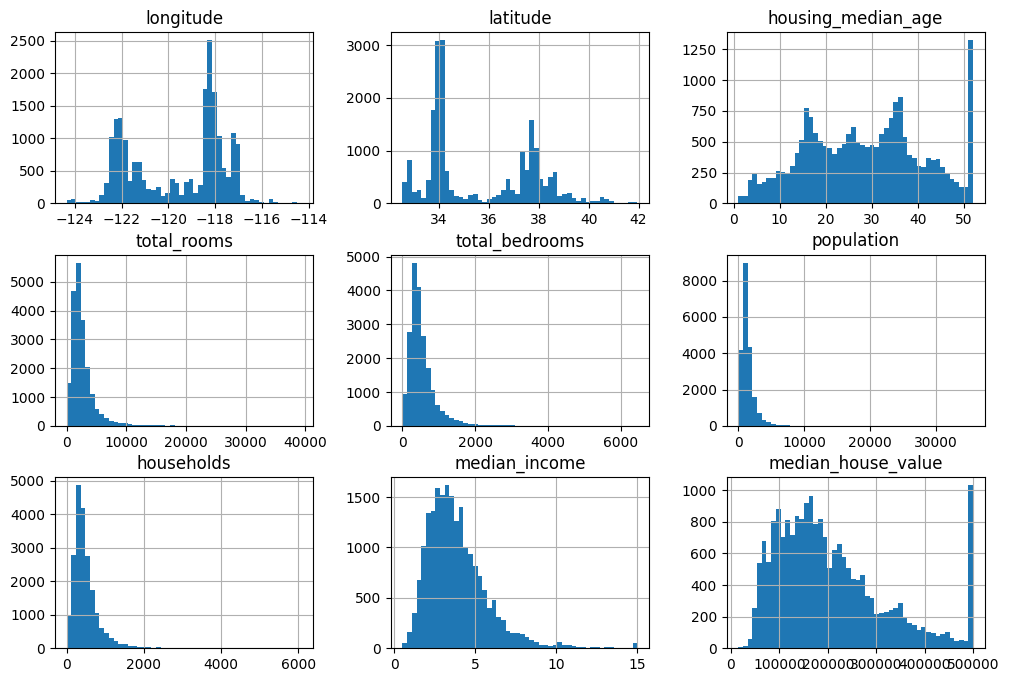

In [243]:
df.hist(bins=50,figsize=(12,8))
plt.show()  

In [244]:
len(df)

20640

In [245]:
df.shape

(20640, 10)

 20640 * 10 metrices

for using sklearn train_test_split we can devide a data in to 2 parts. 
* 1. for a training 
* 2. for a testing purpose 

In [246]:
tarin_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [247]:
tarin_set.shape

(16512, 10)

16521 row use to train the model 

In [248]:
test_set.shape

(4128, 10)

4128 row use to test the model

In [249]:
df["income_cat"]=pd.cut(df["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

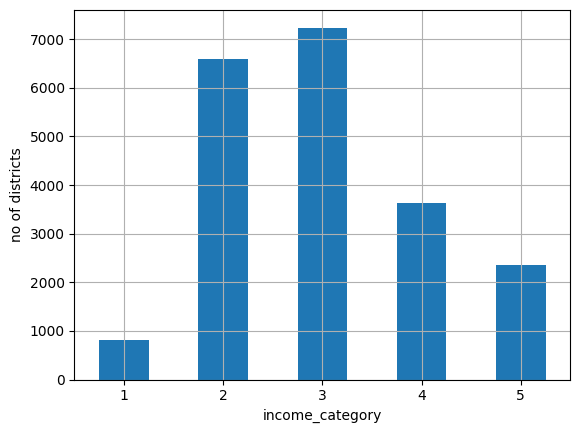

In [250]:
df["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("income_category")
plt.ylabel("no of districts")
plt.show()

In [251]:
from sklearn.model_selection import  StratifiedShuffleSplit 

In [252]:
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index , test_index in splitter.split(df,df["income_cat"]):
    strat_train_set_n=df.iloc[train_index]
    strat_test_set_n=df.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])
    

In [253]:
strat_train_set_n ,strat_test_set_n =strat_splits[0]

In [254]:
strat_train_set ,strat_test_set =train_test_split(df,test_size=0.2,stratify=df["income_cat"],random_state=42)

In [255]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [256]:
# for set_ in (strat_train_set,strat_test_set):
#     set_.drop(df["income_cat"],axis=1,inplace=True)
# df=strat_train_set.copy()

In [257]:
df=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

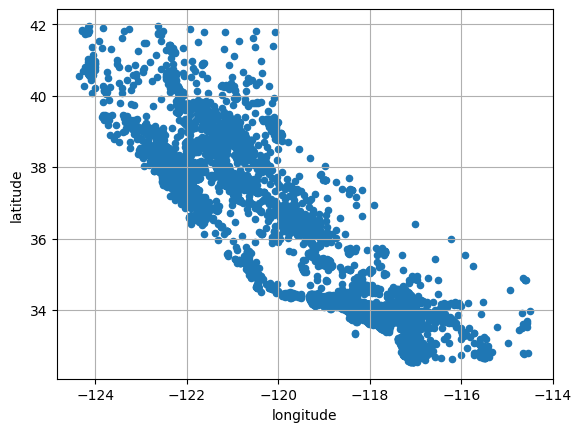

In [258]:
df.plot(kind="scatter",x="longitude",y="latitude",grid=True)

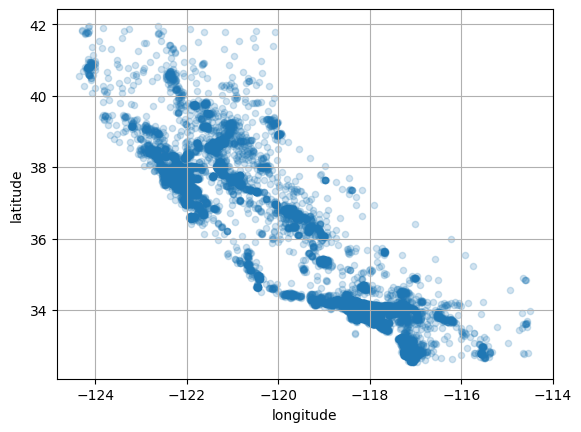

In [259]:
df.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

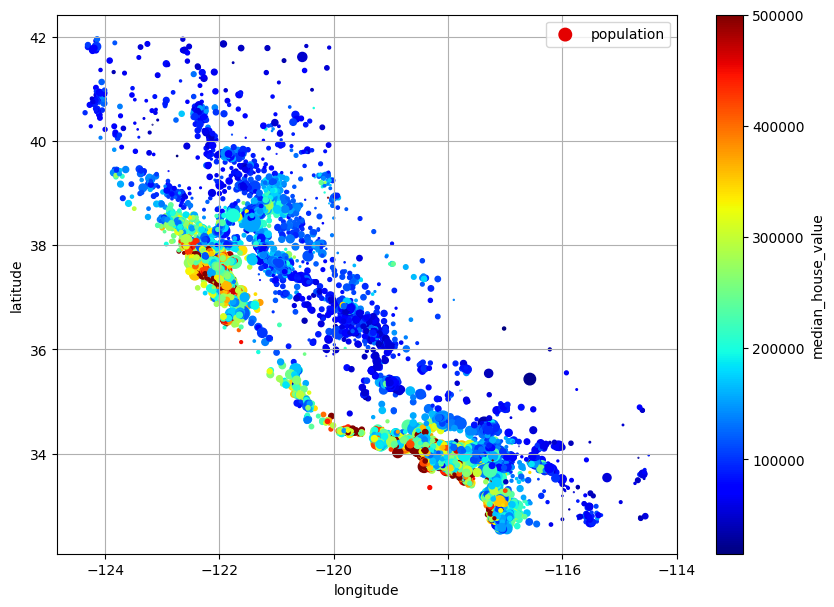

In [260]:
df.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=df["population"]/100,label="population",c="median_house_value",
        cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()

In [261]:
corr_matrix = df.corr(numeric_only=True)

In [262]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

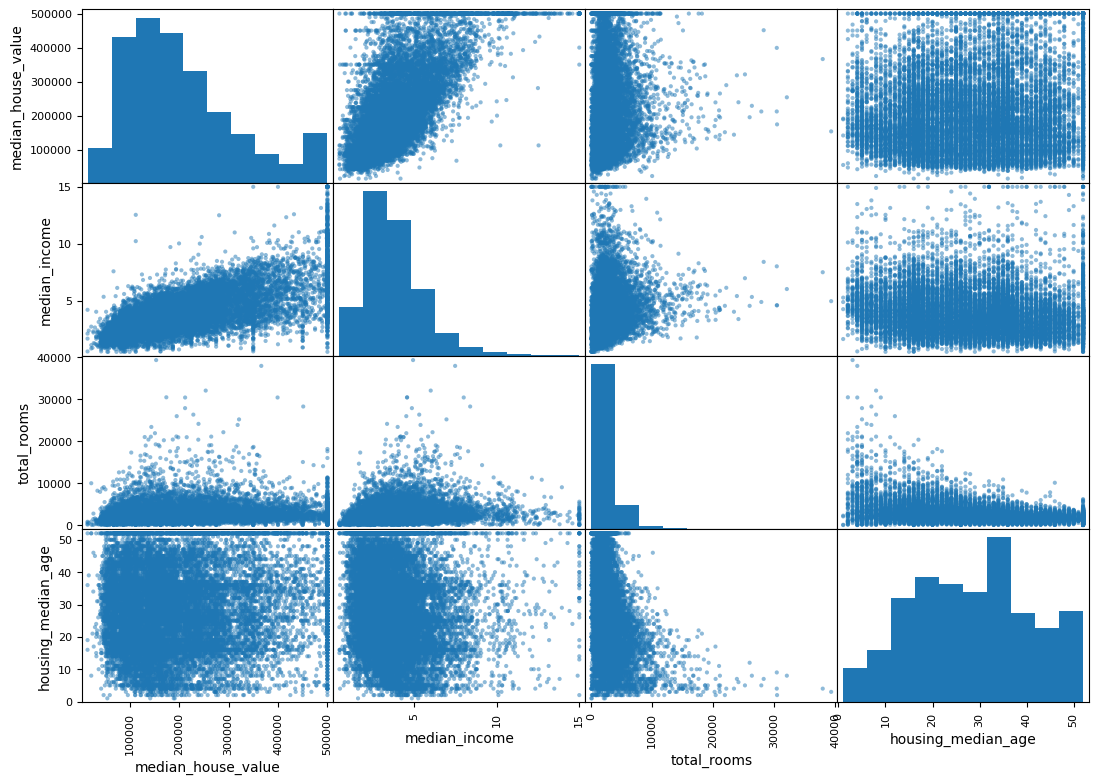

In [263]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(df[attributes],figsize=(13,9))
plt.show()

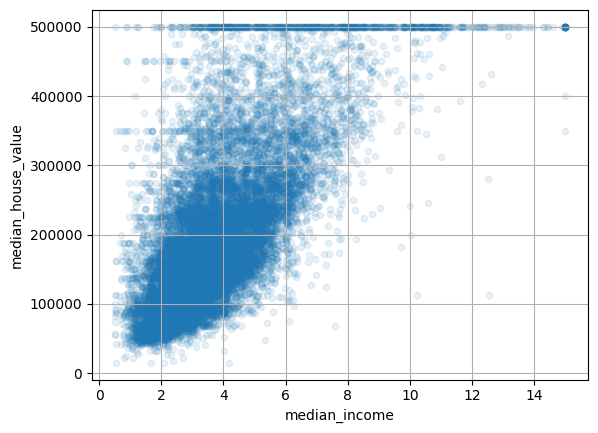

In [264]:
df.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
plt.show()

In [265]:
df["rooms_per_house"]=df["total_rooms"]/df["households"]
df["badrooms_ratio"]=df["total_bedrooms"]/df["total_rooms"]
df["people_per_house"]=df["population"]/df["households"]

In [266]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
badrooms_ratio       -0.256397
Name: median_house_value, dtype: float64


# Prepare the Data for Machine Learning Algorithms

In [267]:
df=strat_train_set.drop("median_house_value",axis=1)
df_labels=strat_train_set["median_house_value"].copy()

# clean the data

In [268]:
from sklearn.impute import  SimpleImputer
imputer= SimpleImputer(strategy="median")
df_num=df.select_dtypes(include=[np.number])

In [269]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [270]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [271]:
df_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [272]:
X=imputer.transform(df_num)
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [273]:
df_tr=pd.DataFrame(X,columns=df_num.columns,index=df_num.index)

# handaling texnd categorial attributes

In [274]:
df_cat=df[["ocean_proximity"]]
df_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [275]:
from sklearn.preprocessing import  OrdinalEncoder

In [276]:
ordinal_encoder= OrdinalEncoder()
df_cat_encoded=ordinal_encoder.fit_transform(df_cat)

In [277]:
df_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [278]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [279]:
from sklearn.preprocessing import  OneHotEncoder


In [280]:
cat_encoder=OneHotEncoder()
df_cat_1hot=cat_encoder.fit_transform(df_cat)

In [281]:
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [282]:
df_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [283]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [284]:
dd_test=pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})
pd.get_dummies(dd_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [285]:
cat_encoder.transform(dd_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [286]:
dd_test_unknown=pd.DataFrame({"ocean_proximity":["<2H OCEAN","ISLAND"]})
pd.get_dummies(dd_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [287]:
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(dd_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [288]:
cat_encoder.transform(dd_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [289]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [290]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [291]:
# dd_output=pd.DataFrame(cat_encoder.transform(dd_test_unknown),columns=cat_encoder.get_feature_names_out(),index=dd_test_unknown.index)

# feature scaling and Transformation

In [292]:
from sklearn.preprocessing import  MinMaxScaler


In [293]:
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
df_num_min_max_scaler=min_max_scaler.fit_transform(df_num)

In [294]:
from sklearn.preprocessing import  StandardScaler

In [295]:
std_scaler=StandardScaler()
df_num_std_scaler=std_scaler.fit_transform(df_num)

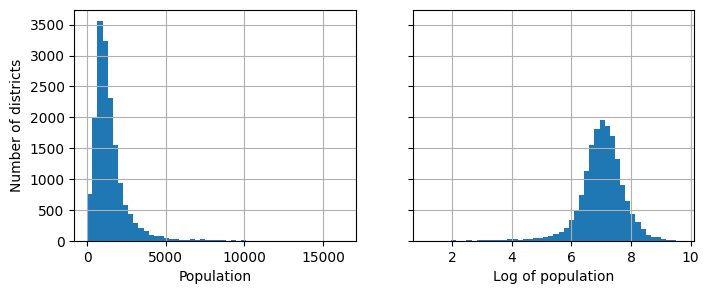

In [296]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["population"].hist(ax=axs[0], bins=50)
df["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
# save_fig("long_tail_plot")
plt.show()

In [297]:
from sklearn.metrics.pairwise import rbf_kernel

In [298]:
age_simil_35=rbf_kernel([[35]],df[["housing_median_age"]])

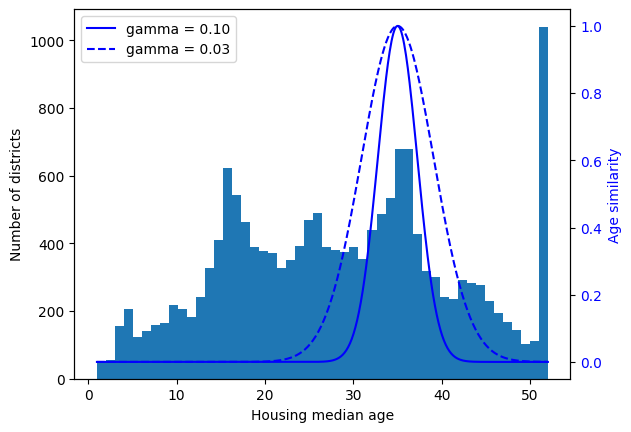

In [299]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(df["housing_median_age"].min(),
                   df["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(df["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")

plt.show()

In [300]:
from sklearn.linear_model import LinearRegression   

In [301]:

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(df_labels.to_frame())

model = LinearRegression()
model.fit(df[["median_income"]], scaled_labels)
some_new_data = df[["median_income"]].iloc[:5]  

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [302]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [303]:
from sklearn.compose import TransformedTargetRegressor


In [304]:
model=TransformedTargetRegressor(regressor=LinearRegression(),transformer=StandardScaler())
model.fit(df[["median_income"]],df_labels)
predictions=model.predict(some_new_data)

In [305]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

# custom transforms

In [306]:
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log,inverse_func=np.exp) 
log_pop=log_transformer.transform(df[["population"]])

In [307]:
rbf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35=rbf_transformer.transform(df[["housing_median_age"]])

In [308]:
sf_coords=37.7749,-122.41
sf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords],gamma=0.1))
sf_simil=sf_transformer.transform(df[["latitude","longitude"]])

In [309]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [310]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [311]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [312]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [313]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(df[["latitude", "longitude"]],
                                           sample_weight=df_labels)

In [314]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

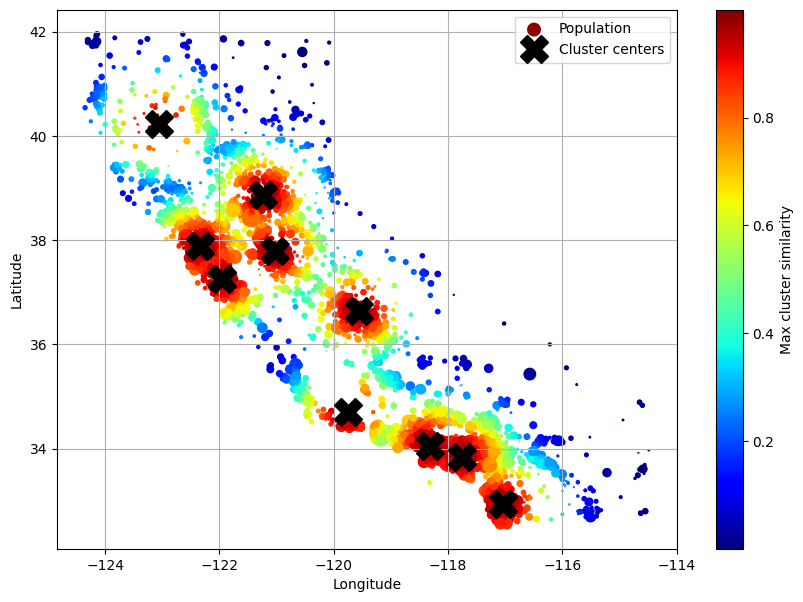

In [315]:
df_renamed = df.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
df_renamed["Max cluster similarity"] = similarities.max(axis=1)

df_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=df_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

# transformation pipelines

In [316]:
from sklearn.pipeline import Pipeline

In [317]:
num_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standaedize",StandardScaler())
])

In [318]:
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [319]:
df_num_prepared=num_pipeline.fit_transform(df_num)
df_num_prepared[:2].round(2
                          )

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [320]:
df_housing_num_prepared=pd.DataFrame(df_num_prepared,columns=num_pipeline.get_feature_names_out(),index=df_num.index)

In [321]:
from sklearn.compose import ColumnTransformer

In [322]:
num_attriesbs=["longitude","latitude","housing_median_value","total_rooms","total_bedrooms","population","households","median_income"]
cat_attributes=["ocean_proximity"]
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

preprocessing=ColumnTransformer([("num",num_pipeline,num_attriesbs),("cat",cat_pipeline,cat_attributes)])

In [323]:
from sklearn.compose import make_column_selector , make_column_transformer

In [324]:
preprocessing = make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include=object)))

In [325]:
housig_prepared=preprocessing.fit_transform(df)

In [326]:
def columns_ratio(X):
    return X[:,[0]]/X[:,[1]]

In [327]:
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

In [328]:
def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(columns_ratio,feature_names_out=ratio_name),StandardScaler())

In [329]:
log_pipeline=make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(np.log,feature_names_out="one-to-one"),StandardScaler()) 
cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1.0,random_state=42)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())   

In [330]:
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [331]:
housig_prepared =preprocessing.fit_transform(df)

In [332]:
housig_prepared.shape

(16512, 25)

In [333]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

# select and train the model 

In [334]:
from sklearn.linear_model import LinearRegression

lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(df,df_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023788910E50>)])),
                ('linearregression', LinearRegression())])

In [335]:
housing_predictions = lin_reg.predict(df)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([248000., 394100., 120700.,  90800., 330300.])

In [336]:
df_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [337]:
from sklearn.metrics import  mean_squared_error

In [338]:
lin_rmse=mean_squared_error(df_labels,housing_predictions,squared=False)

In [339]:
lin_rmse

68047.65535976773

In [340]:
from sklearn.tree import  DecisionTreeRegressor

In [341]:
tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))

In [342]:
tree_reg.fit(df,df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023788910E50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [343]:
housing_predictions=tree_reg.predict(df)

In [344]:
tree_rmse=mean_squared_error(df_labels,housing_predictions,squared=False)

In [345]:
tree_rmse

0.0

In [346]:
from sklearn.model_selection import  cross_val_score


In [347]:
tree_rmses=-cross_val_score(tree_reg,df,df_labels,scoring="neg_root_mean_squared_error",cv=18)

In [348]:
pd.Series(tree_rmses).describe()

count       18.000000
mean     66857.937713
std       3437.564287
min      59912.002810
25%      64627.319957
50%      66527.386354
75%      69619.430472
max      73481.175368
dtype: float64

In [349]:
from sklearn.ensemble import  RandomForestRegressor

In [350]:
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))

In [351]:
forest_rmses=-cross_val_score(forest_reg,df,df_labels,scoring="neg_root_mean_squared_error",cv=10)

In [352]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47042.341721
std       1056.004286
min      45574.447034
25%      46507.787732
50%      46891.828872
75%      47346.956322
max      49424.336447
dtype: float64

In [366]:
from sklearn.model_selection import  GridSearchCV

In [367]:
full_pipeline=make_pipeline(("preprocessing",preprocessing),("RandomForestRegressor",RandomForestRegressor(random_state=42)))

In [368]:
paeam_grid=[{"preprocessing__geo__n_clusters":[5,8,15],"random_forest__max_feature":[4,6,8]},{"preprocessing_geo__n_clusters":[10,15],"random_forest_max_feature":[6,8,10]}]

In [369]:
grid_search=GridSearchCV(full_pipeline,paeam_grid,cv=3,scoring="neg_root_mean_squared_error")



In [372]:
grid_search.fit(df,df_labels)

ValueError: Invalid parameter 'preprocessing' for estimator Pipeline(steps=[('tuple-1',
                 ('preprocessing',
                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('standardscaler',
                                                               StandardScaler())]),
                                    transformers=[('bedrooms',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('functiontransformer',
                                                                    FunctionTransformer(feature_names_out=<function ratio_name...
                                                   ClusterSimilarity(random_state=42),
                                                   ['latitude', 'longitude']),
                                                  ('cat',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('onehotencoder',
                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000023786C82250>)]))),
                ('tuple-2',
                 ('RandomForestRegressor',
                  RandomForestRegressor(random_state=42)))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [371]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'